In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('BostonMarathon2014results.txt') 

In [3]:
df.head(1)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43


### 1. Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. 

2. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. 
3. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [4]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# create blobs


In [5]:
df.head(1)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43


In [6]:
#df.overall.value_counts()

In [7]:
df.info() 
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [8]:
#Drop all times except for 'official', drop name/division, bib, genderdiv, state, city, country too (because 78 is too high for clustering)

df_final = df.drop(['10k', 'name','division', '25k', 'bib', 'genderdiv', 'ctz', '35k', 'state', '30k', '5k', 'half', '20k', 'country', 'city', '40k'], axis=1)

In [9]:
df_final.head(1)

,gender,age,official,overall,pace
0,M,47,85.25,8,3.27


In [10]:
df_final['gender'] = pd.get_dummies(df.gender, drop_first=True)

In [11]:
df_final.head(1)

,gender,age,official,overall,pace
0,1,47,85.25,8,3.27


In [14]:
#Use PCA to transform the 5 features into 2

df_final_pca = PCA(2).fit_transform(df_final)

In [20]:
y_pred = KMeans(n_clusters =2, random_state=42).fit_predict(df_final_pca)

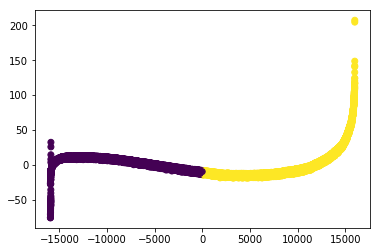

In [21]:
plt.scatter(df_final_pca[:,0], df_final_pca[:,1], c=y_pred)
plt.show()

In [26]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, df_final.gender))

Comparing k-means clusters against the data:
gender     0      1
row_0              
0       5715  10294
1       8652   7323
